In [1]:
import numpy as np
from mvc import *
import matplotlib.pyplot as plt
import cv2

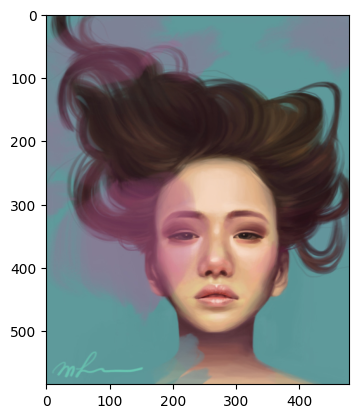

In [2]:
apple = cv2.imread("../src_images/turquoise.png")[:, :, ::-1]
apple = apple.astype(np.float32) / 256
plt.imshow(apple)

In [3]:
pallete = np.array([
   [0.961961, 0.844118, 0.763627],
   [0.899059, 0.787753, 0.568226],
   [0.120878, 0.06273, 0.0735538],
   [0.796073, 0.345237, 0.307123],
   [0.679, 0.380813, 0.574822],
   [0.311789, 0.832315, 0.764997]
])

coords = get_mvc_of_pixels(apple, pallete)

In [4]:
print(coords.flatten().max())

2935.6904501903605


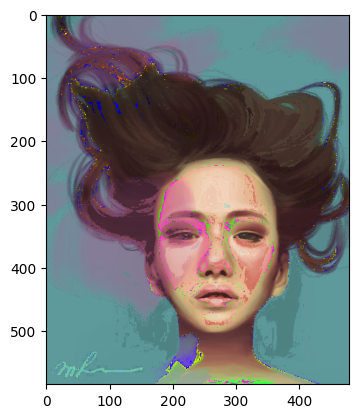

In [5]:
reconstruction = np.clip(construct_image_from_mvc(coords, pallete), 0, 1)
plt.imshow(reconstruction)

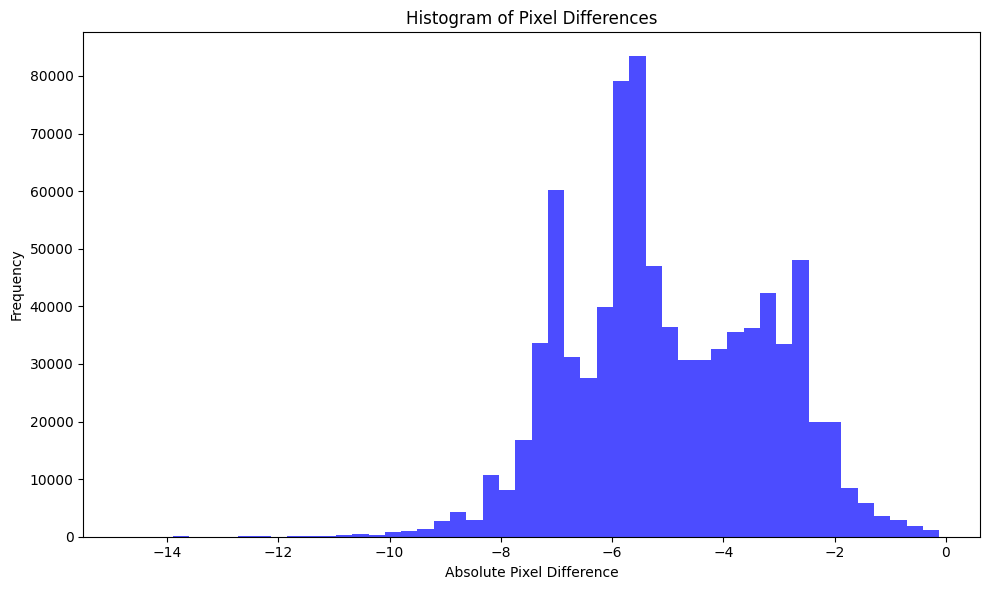

In [6]:
difference = np.log(np.abs(apple - reconstruction))

plt.figure(figsize=(10, 6))
plt.hist(difference.ravel(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Pixel Differences')
plt.xlabel('Absolute Pixel Difference')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

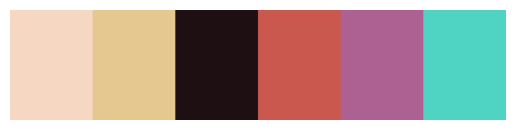

In [7]:
def show_pallete(pallete, width = 100, height = 100):
    N, _ = pallete.shape
    image = np.zeros((height, N*width, 3))
    for i in range(N):
        colour = pallete[i]
        image[:, i*width:(i+1)*width] = colour

    plt.imshow(image)
    plt.axis('off')

show_pallete(pallete, width=150, height=200)
